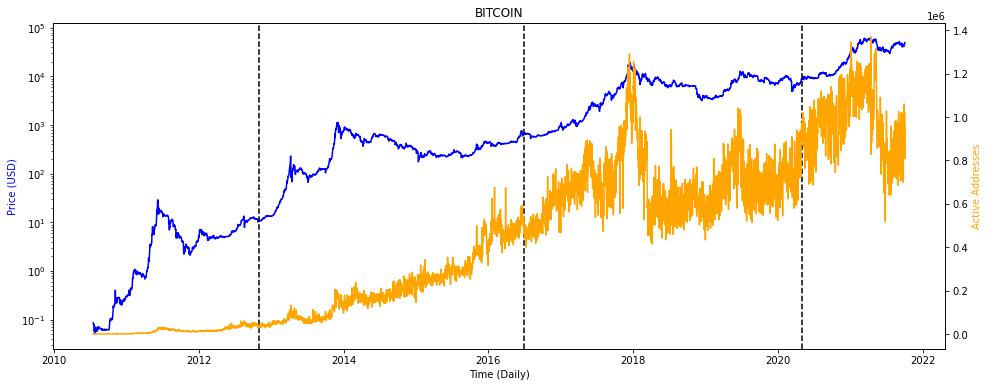

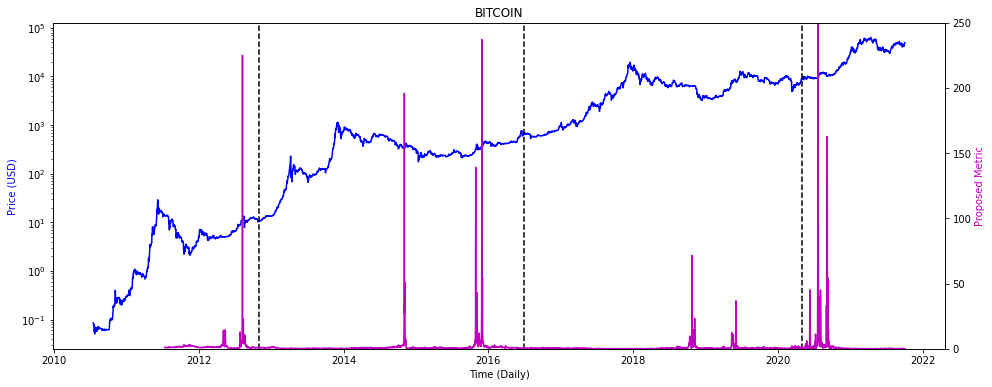

The distances between the spikes and the halving events.
              t      metric  nb_months
1217 2012-05-04   12.133840   5.946734
1218 2012-05-05   14.092213   5.913879
1227 2012-05-14   14.499308   5.618185
1302 2012-07-28   12.905409   3.154069
1313 2012-08-08   31.745437   2.792665
1314 2012-08-09  224.891291   2.759810
1315 2012-08-10   10.438609   2.726955
1318 2012-08-13   23.102788   2.628391
1323 2012-08-18   10.849572   2.464116
1327 2012-08-22   10.303311   2.332697
              t      metric  nb_months
2131 2014-11-04  195.805887  19.877205
2491 2015-10-30  139.186141   8.049447
2522 2015-11-30  237.031244   7.030945
              t     metric  nb_months
3583 2018-10-26  71.606691  18.168751
3804 2019-06-04  36.722798  10.907822


In [107]:
import scipy
from scipy import optimize
import pandas as pd
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

orange = '#FFA500'
halving1 = dt.datetime(2012, 11, 1)
halving2 = dt.datetime(2016, 7, 1)
halving3 = dt.datetime(2020, 5, 1)

df = pd.read_csv('btc.csv', delimiter=",")
df = df[['date', 'PriceUSD', 'BlkCnt', 'AdrActCnt', 'RevUSD']]
#df['total_blocks'] = df['BlkCnt'].cumsum()
df = df.dropna()
df['t'] = pd.to_datetime(df['date'])

# Proposed metric = abs(% change in 360 day sma - active addresses) / abs(% change in 360 day sma - price)
df['cyclic_mean'] = df['AdrActCnt'].rolling(360).mean()
df['price_mean'] = df['PriceUSD'].rolling(360).mean()
df['price_dif'] = df['price_mean'].pct_change()
df['cycle_dif'] = df['cyclic_mean'].pct_change()
df['metric'] = (df['cycle_dif'].abs() / df['price_dif'].abs())
df.to_csv('metric.csv')

# Plot BTC prices / Active Addresses
fig, ax = plt.subplots(1,1,figsize=(16,6))
ax2 = ax.twinx()
ax.plot(df['t'], df['PriceUSD'], label='Price(USD)', color='b')
ax2.plot(df['t'], df['AdrActCnt'], color=orange, label='Active Addresses')  #number of active addresses.
ax.axvline(halving1, linestyle='--', color='k')
ax.axvline(halving2, linestyle='--', color='k')
ax.axvline(halving3, linestyle='--', color='k')
ax.set_xlabel("Time (Daily)")
ax.set_ylabel("Price (USD)", color='b')
ax2.set_ylabel("Active Addresses", color=orange)
plt.title('BITCOIN')
ax.set_yscale('log')
plt.show()

# Plot BTC prices / Proposed Metric
fig, ax = plt.subplots(1,1,figsize=(16,6))
ax2 = ax.twinx()
ax.plot(df['t'], df['PriceUSD'], label='Price(USD)', color='b')
ax2.plot(df['t'], df['metric'] , color='m')
ax.axvline(halving1, linestyle='--', color='k')
ax.axvline(halving2, linestyle='--', color='k')
ax.axvline(halving3, linestyle='--', color='k')
ax.set_xlabel("Time (Daily)")
ax.set_ylabel("Price (USD)", color='b')
ax2.set_ylabel("Proposed Metric", color='m')
plt.title('BITCOIN')
ax.set_yscale('log')
ax2.set_ylim([0,250])
plt.show()

# calculate the distances...
print('The distances between the spikes and the halving events.')
tar1 = df[(df['t'] > '2010-01-1') & (df['t'] < '2012-11-1')]
tar1 = tar1[(tar1['metric'] > 10)]
tar1['nb_months'] = ((halving1 - tar1['t'])/np.timedelta64(1, 'M'))
print(tar1[['t', 'metric','nb_months']])
tar2 = df[(df['t'] > '2013-01-1') & (df['t'] < '2016-7-1')]
tar2 = tar2[(tar2['metric'] > 100)]
tar2['nb_months'] = ((halving2 - tar2['t'])/np.timedelta64(1, 'M'))
print(tar2[['t', 'metric','nb_months']])
tar3 = df[(df['t'] > '2018-01-1') & (df['t'] < '2020-5-1')]
tar3 = tar3[(tar3['metric'] > 35)]
tar3['nb_months'] = ((halving3 - tar3['t'])/np.timedelta64(1, 'M'))
print(tar3[['t', 'metric', 'nb_months']])

